# "Exploratory Data Analysis of Apollo 24/7 Doctors: Uncovering Insights from Web Scraped Data"

 Problem Statement : Addressing Healthcare Access and Doctor Selection Challenges through Data Analysis

Agenda:
1)Data Cleaning Steps  
2)Data Manipulation Steps
3)Data Summary
4)Univariate Analysis  Steps
5)Bivariate Analysis  Steps 
6)Multivariate analysis
7)Scenarios
8)Key Findings
9)Conclusion 
10)Q&A Slide 

Webscrapping : Web scraping refers to the process of automatically extracting data from websites using software tools

Website : https://www.apollo247.com/specialties/

SINGLE PAGE DATA COLLECTION

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [4]:
url = "https://www.apollo247.com/doctors/doctors-in-hyderabad-dcity"

In [5]:
page = requests.get(url)

In [6]:
page

<Response [200]>

In [7]:
soup = BeautifulSoup(page.content)

In [8]:
a = soup.find_all('h2')

In [10]:
Doctorname = []
for i in a:
    text = i.text
    Doctorname.append(text)

In [13]:
Doctorname = Doctorname[1:10]
Doctorname

['Dr. K Mahajan Roy',
 'Dr. K Sri Chaitanya Reddy',
 'Dr. Vijayashree Kumaraswamy Midathala',
 'Dr. V Madhavi',
 'Dr. Moksha Prasuna',
 'Dr. Syamala Aiyangar',
 'Dr. Siddharth Potluri',
 'Dr. M Hari Sharma']

In [14]:
speciality=[]
s = soup.find_all('p', title="Specialty")
for i in s:
    speciality.append(i.text)

In [15]:
speciality = speciality[1:10]
speciality

['General Physician/ Internal Medicine Specialist',
 'General Physician/ Internal Medicine Specialist',
 'Family Physician',
 'Endocrinologist',
 'Gynecologic Surgeon',
 'General Physician/ Internal Medicine Specialist',
 'Orthopaedician',
 'Orthopaedician',
 'Orthopaedician']

In [16]:
experience = []
e=soup.find_all('span',title = "Experience" )
for i in e:
    text = i.text
    regex = re.findall('(\d+)',text)
    experience.append(regex[0])

In [17]:
experience = experience[1:10]
experience

['9', '3', '20', '10', '32', '15', '6', '30', '10']

In [18]:
Qualification = []
Q = soup.find_all('p',title = 'Qualification')
for i in Q:
    Qualification.append(i.text)

In [19]:
Qualification = Qualification[1:10]
Qualification

['MBBS, DNB/MD',
 'DR NTR UNIVERSITY',
 'MBBS, CCEBDM, CCMTD',
 'MD DM',
 'MBBS,DGO,MS(GENERAL SURGERY) , FMAS,ISCP',
 'MBBS, DNB (Int. med.)',
 'MBBS, MS (Orthopedics),  MCh (UK).',
 'MBBS, MS (ORTHO)',
 'MBBS,MS(Ortho, NIMS,Hyd) Fellowship in Shoulder and Elbow Surgery(Seoul, S.Korea) Fellowship in Arthroscopy and Sports Injury  Fellowship in Joint Replacement  Consultant Orthopaedic Surgeon']

EXTRACTING DATA USING REGULAR EXPRESSIONS

In [20]:
ConsultationFee = []
a = soup.find_all('div',class_='MuiGrid-root MuiGrid-item MuiGrid-grid-xs-12 MuiGrid-grid-sm-12 MuiGrid-grid-md-12 MuiGrid-grid-lg-6')
for i in a :
    #print (i.text)
    text = i.text
    regex = re.findall('\s(\d+)',text)
    ConsultationFee.append(regex[0])

In [22]:
ConsultationFee = ConsultationFee[1:10]
ConsultationFee

['400', '500', '800', '600', '700', '600', '800', '600']

In [24]:
Language = []
Lan = soup.find_all('div',title='Language')
for i in Lan:
    Language.append(i.text)

In [25]:
Language = Language[1:10]
Language

['English, Hindi, Telugu',
 'English, Hindi, Telugu',
 'English, Telugu, Hindi',
 'English, Hindi, Telugu',
 'English, Hindi, Telugu',
 'English, Hindi, Telugu',
 'English, Hindi, Telugu, Kannada',
 'English, Hindi, Telugu',
 'English, Hindi, Telugu']

In [26]:
Location = []
Loc = soup.find_all('div',title='Location')
for i in Loc:
    Location.append(i.text)

In [27]:
Location = Location[1:10]
Location

['APOLLO SOCIETY CLINICS HYD, Hyderabad',
 'APOLLO SOCIETY CLINICS HYD, Hyderabad',
 'APOLLO SOCIETY CLINICS HYD, Hyderabad',
 'Apollo Sugar Clinics, Hyderguda, Hyderabad',
 'Apollo Hospitals Hyderguda, Hyderabad',
 'Apollo Hospitals Hyderguda, Hyderabad',
 'Apollo Hospitals Hyderguda, Hyderabad',
 'Apollo Hospitals Hyderguda, Hyderabad',
 'Apollo Hospitals Hyderguda, Hyderabad']

MULTIPLE PAGE DATA COLLECTION

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Doctorname = []
Qualification = []
speciality=[]
experience = []
ConsultationFee = []
Language = []
Location = []
l=['diabetology', 'critical-care','Cardiologist','Neurosurgeon','Gynecologic','Nephrologist','Ent','Orthopaedician','Dermatologist']
for i in l:
    Url='https://www.apollo247.com/specialties/'+i
    page = requests.get(Url)
    soup = BeautifulSoup(page.content)
    a = soup.find_all('h2')
    for i in a:
        text = i.text
        Doctorname.append(text)
    Q = soup.find_all('p',title = 'Qualification')
    for i in Q:
        Qualification.append(i.text)
    s = soup.find_all('p', title="Specialty")
    for i in s:
        speciality.append(i.text)
    e=soup.find_all('span',title = "Experience" )
    for i in e:
        text = i.text
        regex = re.findall('(\d+)',text)
        experience.append(regex[0])
    g = soup.find_all('div',class_='MuiGrid-root MuiGrid-item MuiGrid-grid-xs-12 MuiGrid-grid-sm-12 MuiGrid-grid-md-12 MuiGrid-grid-lg-6')
    for i in g :
    #print (i.text)
        text = i.text
        regex = re.findall('\s(\d+)',text)
        ConsultationFee.append(regex[0])
    Lan = soup.find_all('div',title='Language')
    for i in Lan:
        Language.append(i.text)
    Loc = soup.find_all('div',title='Location')
    for i in Loc:
        Location.append(i.text)

In [ ]:
len(DoctorName) 

563

In [ ]:
DoctorName = Doctorname[0:563]

In [ ]:
len(Qualification) 

563

In [ ]:
len(speciality)

563

In [ ]:
len(experience) 

563

In [ ]:
len(ConsultationFee) 

563

In [ ]:
len(Language) 

563

In [ ]:
len(Location)

563

CREATING A DATAFRAME

In [ ]:
 df = pd.DataFrame(data)

In [ ]:
data = {'DoctorName':DoctorName,'Qualification':Qualification,'Speciality':speciality,'Experience':experience,'ConsultationFee':ConsultationFee,'Language':Language,'Location':Location}

In [ ]:
df.to_csv('data.csv') # SAVING INTO CSV FILE

In [21]:
apollo=pd.read_csv('data.csv') # READING THE DATA FROM SAVED CSV FILE

In [22]:
apollo

,Unnamed: 0,DoctorName,Qualification,Speciality,Experience,ConsultationFee,Language,Location
0,0,Dr. Arcojit Ghosh,"MBBS,MD (pharm)",Diabetologist,10,765,"English, Hindi, Bengali","CG INCURE, Kolkata"
1,1,Dr. Utsa Basu,"MBBS, FICM, Dip. Clinical Endocrinology & Diab...",Diabetologist,12,1000,"English, Hindi, Bengali","Dr. Utsa Basu's Clinic, North 24 Parganas"
2,2,Dr. Sandip Kumar Mondal,MBBS MD,Diabetologist,15,705,"English, Hindi, Bengali","Medihealth point, Kolkata"
3,3,Dr. Parwez,"MBBS, DNB",General Physician/ Internal Medicine Specialist,10,600,"English, Hindi","DR PARWEZ CLINIC, Ghaziabad"
4,4,Dr. Dhanraj K,"MBBS, MD (Internal Medicine)",General Physician/ Internal Medicine Specialist,23,1000,"English, Hindi, Telugu","Apollo Hospitals Jubilee Hills, Hyderabad"
...,...,...,...,...,...,...,...,...
558,558,Dr. Tripti Deb,"MBBS , MS(Oto-rhinolaryngology and head & neck...",Ent Specialist,6,600,"English, Hindi, Bengali","RA Dent Clinic, Kolkata"
559,559,Dr. Pushkraj Deshmukh,"MBBS, MS (OBG), Fellowship in Reproductive Med...",Obstetrician and Gynaecologist,9,650,"English, Hindi, Kannada, Telugu","Apollo Medical Center, Marathahalli, Bangalore"
560,560,Dr. Swastik Satpathy,"MBBS, MD (Paed.)",Paediatrician,8,850,"English, Hindi, Bengali","ASTERS CLINIC, Kolkata"
561,561,Dr. Dhanraj K,"MBBS, MS (ENT) , RHINOPLASTY AND FACIAL AESTHE...",Cosmetologist,17,800,"English, Hindi","Aishanya Aesthetic Centre, Delhi"


In [23]:
# CLEANING THE DATA BY SPLITTING COLUMNS THAT ARE REQUIRED FOR OUR ANALYSIS

In [24]:
city=[]
hospital_name=[]
for i in apollo['Location']:
    x=i.split(',')
    city.append(x[-1])
    s=" ".join(x[:-1])
    hospital_name.append(s)

In [25]:
apollo['hospital_name']=hospital_name
apollo['city']=city

In [26]:
apollo.head()

,Unnamed: 0,DoctorName,Qualification,Speciality,Experience,ConsultationFee,Language,Location,hospital_name,city
0,0,Dr. Arcojit Ghosh,"MBBS,MD (pharm)",Diabetologist,10,765,"English, Hindi, Bengali","CG INCURE, Kolkata",CG INCURE,Kolkata
1,1,Dr. Utsa Basu,"MBBS, FICM, Dip. Clinical Endocrinology & Diab...",Diabetologist,12,1000,"English, Hindi, Bengali","Dr. Utsa Basu's Clinic, North 24 Parganas",Dr. Utsa Basu's Clinic,North 24 Parganas
2,2,Dr. Sandip Kumar Mondal,MBBS MD,Diabetologist,15,705,"English, Hindi, Bengali","Medihealth point, Kolkata",Medihealth point,Kolkata
3,3,Dr. Parwez,"MBBS, DNB",General Physician/ Internal Medicine Specialist,10,600,"English, Hindi","DR PARWEZ CLINIC, Ghaziabad",DR PARWEZ CLINIC,Ghaziabad
4,4,Dr. Dhanraj K,"MBBS, MD (Internal Medicine)",General Physician/ Internal Medicine Specialist,23,1000,"English, Hindi, Telugu","Apollo Hospitals Jubilee Hills, Hyderabad",Apollo Hospitals Jubilee Hills,Hyderabad


In [27]:
apollo.drop(['Location'],axis = 1,inplace = True) # DROPPING THE ORIGINAL COLUMN 

In [28]:
apollo['1st Language'] = apollo['Language'].str.split(',').str[0]

In [32]:
apollo

,Unnamed: 0,DoctorName,Qualification,Speciality,Experience,ConsultationFee,Language,hospital_name,city,1st Language
0,0,Dr. Arcojit Ghosh,"MBBS,MD (pharm)",Diabetologist,10,765,"English, Hindi, Bengali",CG INCURE,Kolkata,English
1,1,Dr. Utsa Basu,"MBBS, FICM, Dip. Clinical Endocrinology & Diab...",Diabetologist,12,1000,"English, Hindi, Bengali",Dr. Utsa Basu's Clinic,North 24 Parganas,English
2,2,Dr. Sandip Kumar Mondal,MBBS MD,Diabetologist,15,705,"English, Hindi, Bengali",Medihealth point,Kolkata,English
3,3,Dr. Parwez,"MBBS, DNB",General Physician/ Internal Medicine Specialist,10,600,"English, Hindi",DR PARWEZ CLINIC,Ghaziabad,English
4,4,Dr. Dhanraj K,"MBBS, MD (Internal Medicine)",General Physician/ Internal Medicine Specialist,23,1000,"English, Hindi, Telugu",Apollo Hospitals Jubilee Hills,Hyderabad,English
...,...,...,...,...,...,...,...,...,...,...
558,558,Dr. Tripti Deb,"MBBS , MS(Oto-rhinolaryngology and head & neck...",Ent Specialist,6,600,"English, Hindi, Bengali",RA Dent Clinic,Kolkata,English
559,559,Dr. Pushkraj Deshmukh,"MBBS, MS (OBG), Fellowship in Reproductive Med...",Obstetrician and Gynaecologist,9,650,"English, Hindi, Kannada, Telugu",Apollo Medical Center Marathahalli,Bangalore,English
560,560,Dr. Swastik Satpathy,"MBBS, MD (Paed.)",Paediatrician,8,850,"English, Hindi, Bengali",ASTERS CLINIC,Kolkata,English
561,561,Dr. Dhanraj K,"MBBS, MS (ENT) , RHINOPLASTY AND FACIAL AESTHE...",Cosmetologist,17,800,"English, Hindi",Aishanya Aesthetic Centre,Delhi,English


In [33]:
apollo.to_csv('final.csv')

In [3]:
Top_aplo_doc = pd.read_csv('final.csv')

In [4]:
Top_aplo_doc.shape

(563, 11)

In [5]:
Top_aplo_doc.drop("Unnamed: 0", axis=1, inplace=True)
Top_aplo_doc.drop("Unnamed: 0.1", axis=1, inplace=True)

In [6]:
Top_aplo_doc

,DoctorName,Qualification,Speciality,Experience,ConsultationFee,Language,hospital_name,city,1st Language
0,Dr. Arcojit Ghosh,"MBBS,MD (pharm)",Diabetologist,10,765,"English, Hindi, Bengali",CG INCURE,Kolkata,English
1,Dr. Utsa Basu,"MBBS, FICM, Dip. Clinical Endocrinology & Diab...",Diabetologist,12,1000,"English, Hindi, Bengali",Dr. Utsa Basu's Clinic,North 24 Parganas,English
2,Dr. Sandip Kumar Mondal,MBBS MD,Diabetologist,15,705,"English, Hindi, Bengali",Medihealth point,Kolkata,English
3,Dr. Parwez,"MBBS, DNB",General Physician/ Internal Medicine Specialist,10,600,"English, Hindi",DR PARWEZ CLINIC,Ghaziabad,English
4,Dr. Dhanraj K,"MBBS, MD (Internal Medicine)",General Physician/ Internal Medicine Specialist,23,1000,"English, Hindi, Telugu",Apollo Hospitals Jubilee Hills,Hyderabad,English
...,...,...,...,...,...,...,...,...,...
558,Dr. Tripti Deb,"MBBS , MS(Oto-rhinolaryngology and head & neck...",Ent Specialist,6,600,"English, Hindi, Bengali",RA Dent Clinic,Kolkata,English
559,Dr. Pushkraj Deshmukh,"MBBS, MS (OBG), Fellowship in Reproductive Med...",Obstetrician and Gynaecologist,9,650,"English, Hindi, Kannada, Telugu",Apollo Medical Center Marathahalli,Bangalore,English
560,Dr. Swastik Satpathy,"MBBS, MD (Paed.)",Paediatrician,8,850,"English, Hindi, Bengali",ASTERS CLINIC,Kolkata,English
561,Dr. Dhanraj K,"MBBS, MS (ENT) , RHINOPLASTY AND FACIAL AESTHE...",Cosmetologist,17,800,"English, Hindi",Aishanya Aesthetic Centre,Delhi,English


In [7]:
Top_aplo_doc['city'].unique()

array([' Kolkata', ' North 24 Parganas', ' Ghaziabad', ' Hyderabad',
       ' Bengaluru', ' Chennai', ' Gurugram', ' Pune', ' Bangalore',
       ' Indore', ' Tiruvallur', ' Nashik', ' Guwahati', ' Chittoor',
       ' Nalgonda', ' Mumbai', ' Bhubaneswar', ' Delhi', ' South Delhi',
       ' Warangal', ' Ahmedabad', ' Dombivali East', ' Gurgaon',
       ' Greater Noida', ' Mira Road', ' Noida', ' East Delhi',
       ' Visakhapatnam', ' Lucknow'], dtype=object)

In [8]:
Top_aplo_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DoctorName       563 non-null    object
 1   Qualification    563 non-null    object
 2   Speciality       563 non-null    object
 3   Experience       563 non-null    int64 
 4   ConsultationFee  563 non-null    int64 
 5   Language         563 non-null    object
 6   hospital_name    563 non-null    object
 7   city             563 non-null    object
 8   1st Language     563 non-null    object
dtypes: int64(2), object(7)
memory usage: 39.7+ KB


In [11]:
# we have 9 columns from and 563 rows from the above data 
# 2 columns are having numerical data and remaining are have catogorical data

        DESCRIPTIVE DATA ANALYSIS OF THE 2 NUMERICAL COLUMNS DATA

In [12]:
Top_aplo_doc.describe()

,Experience,ConsultationFee
count,563.000000,563.000000
mean,11.868561,709.451155
std,7.774888,377.839959
min,1.000000,200.000000
25%,6.000000,500.000000
50%,11.000000,600.000000
75%,15.000000,840.000000
max,53.000000,5000.000000


In [13]:
Top_aplo_doc.select_dtypes(exclude = "number")

,DoctorName,Qualification,Speciality,Language,hospital_name,city,1st Language
0,Dr. Arcojit Ghosh,"MBBS,MD (pharm)",Diabetologist,"English, Hindi, Bengali",CG INCURE,Kolkata,English
1,Dr. Utsa Basu,"MBBS, FICM, Dip. Clinical Endocrinology & Diab...",Diabetologist,"English, Hindi, Bengali",Dr. Utsa Basu's Clinic,North 24 Parganas,English
2,Dr. Sandip Kumar Mondal,MBBS MD,Diabetologist,"English, Hindi, Bengali",Medihealth point,Kolkata,English
3,Dr. Parwez,"MBBS, DNB",General Physician/ Internal Medicine Specialist,"English, Hindi",DR PARWEZ CLINIC,Ghaziabad,English
4,Dr. Dhanraj K,"MBBS, MD (Internal Medicine)",General Physician/ Internal Medicine Specialist,"English, Hindi, Telugu",Apollo Hospitals Jubilee Hills,Hyderabad,English
...,...,...,...,...,...,...,...
558,Dr. Tripti Deb,"MBBS , MS(Oto-rhinolaryngology and head & neck...",Ent Specialist,"English, Hindi, Bengali",RA Dent Clinic,Kolkata,English
559,Dr. Pushkraj Deshmukh,"MBBS, MS (OBG), Fellowship in Reproductive Med...",Obstetrician and Gynaecologist,"English, Hindi, Kannada, Telugu",Apollo Medical Center Marathahalli,Bangalore,English
560,Dr. Swastik Satpathy,"MBBS, MD (Paed.)",Paediatrician,"English, Hindi, Bengali",ASTERS CLINIC,Kolkata,English
561,Dr. Dhanraj K,"MBBS, MS (ENT) , RHINOPLASTY AND FACIAL AESTHE...",Cosmetologist,"English, Hindi",Aishanya Aesthetic Centre,Delhi,English


In [14]:
Numerical= Top_aplo_doc.select_dtypes(include = "number")
Numerical

,Experience,ConsultationFee
0,10,765
1,12,1000
2,15,705
3,10,600
4,23,1000
...,...,...
558,6,600
559,9,650
560,8,850
561,17,800


# Univariate analysis

Univariate analysis on the each required column to understand the number of occurrences of each category in the variable.

In [15]:
# total no of unique Qualification

In [16]:
Top_aplo_doc['Qualification'].nunique()

154

In [17]:
# count of  Qualification frequency
#Mode: Identifying the most frequent category in the variable.

In [18]:
Top_aplo_doc['Qualification'].value_counts()

MBBS                                                                                    66
BDS                                                                                     42
BDS, MDS (Conservative Dentistry & Endodontics)                                         30
MBBS, MD (DVL)                                                                          18
MBBS, DNB                                                                                8
                                                                                        ..
MBBS, F.Diab                                                                             1
MBBS,DNB GENERAL MEDICINE(MD),Delhi NCR                                                  1
MBBS, MD (Medicine), DNB (Endocrinology) FACE (USA)                                      1
MBBS, , CCEBDM                                                                           1
MBBS, MD (GENERAL MEDICINE), Certificate Programme clinicians in Diabetes Management     1

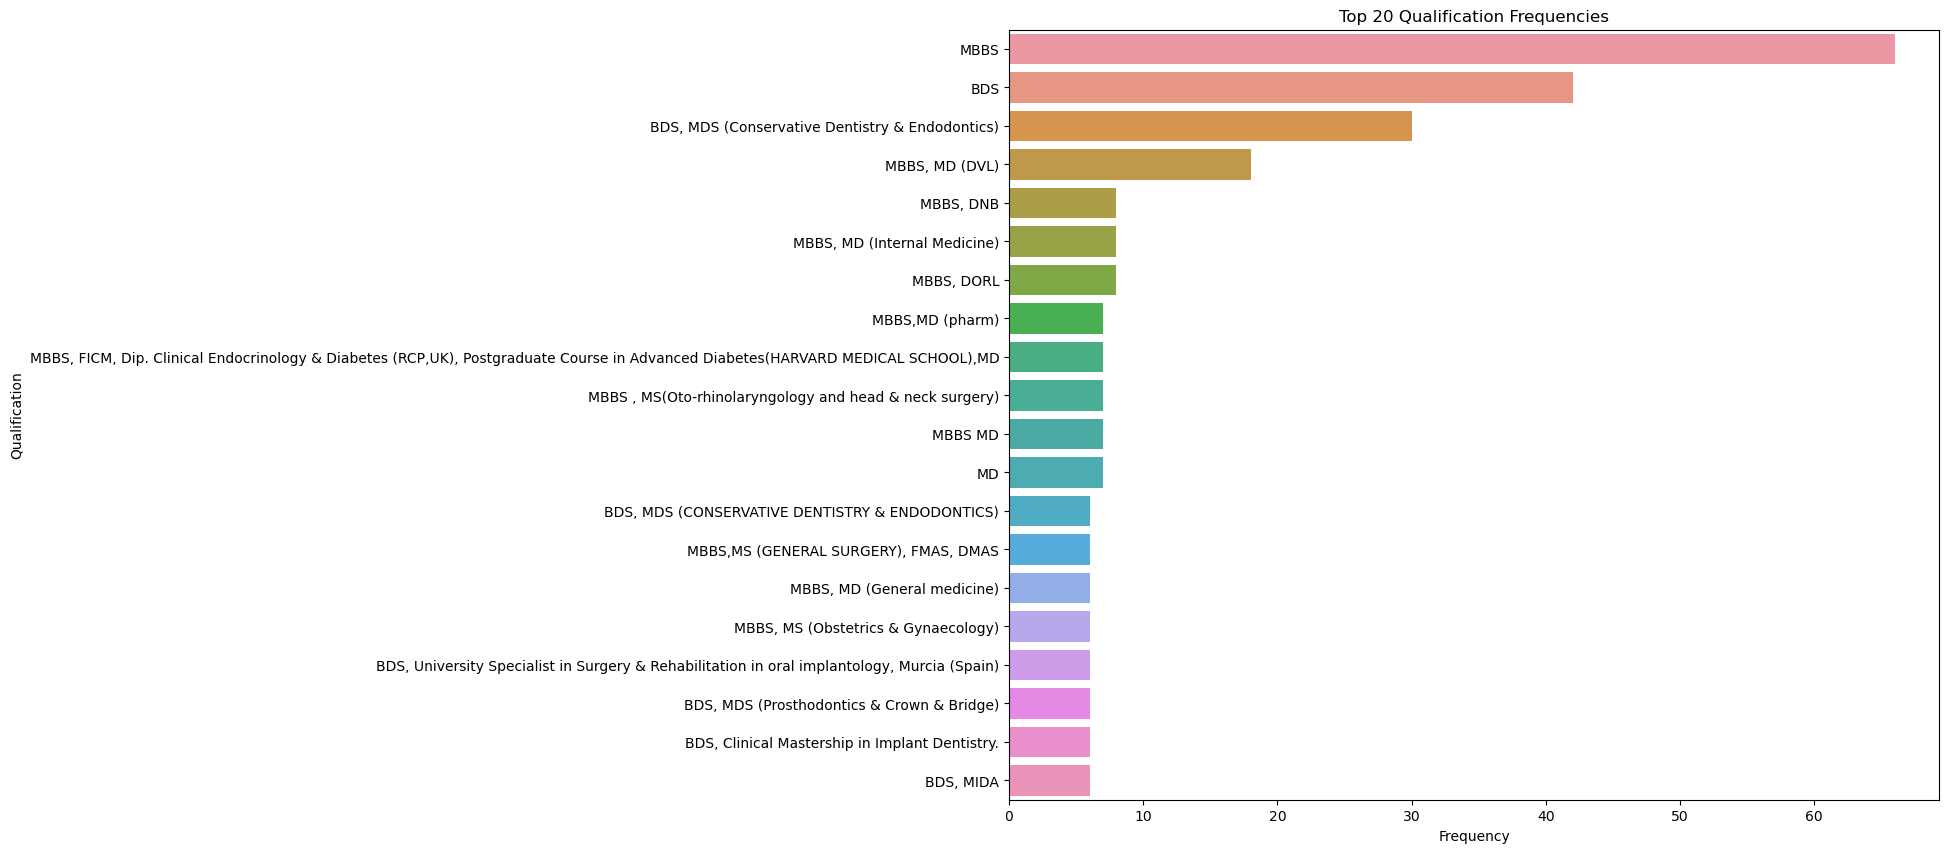

In [28]:
plt.figure(figsize=(12, 10))
qualification_counts = Top_aplo_doc['Qualification'].value_counts()
qualification_counts = qualification_counts[:20]  # Display the top 20 qualifications
sns.barplot(y=qualification_counts.index, x=qualification_counts.values, orient='h')
plt.xlabel('Frequency')
plt.ylabel('Qualification')
plt.title('Top 20 Qualification Frequencies')
plt.show()

From the above graph we can understand these are the qualifications which are in high demand or are more commonly pursued by doctors.It can guide decision-making processes for aspiring doctors, healthcare institutions, and policymakers in understanding the supply and demand of specific qualifications in the healthcare sector.

In [16]:
# counts each specialization frequency
#Mode: Identifying the most frequent category in the variable.

In [17]:
Top_aplo_doc['Speciality'].value_counts()

General Physician/ Internal Medicine Specialist    134
Dentist                                            120
Ent Specialist                                      63
Diabetologist                                       37
Dermatologist                                       30
Cosmetologist                                       27
Obstetrician and Gynaecologist                      26
Family Physician                                    20
Paediatrician                                       19
Cardiologist                                        13
Critical Care Specialist                            12
Endodontist                                         12
Orthopaedician                                      12
Pulmonology Respiratory Medicine Specialist         10
Family Physician Covid Consult                       7
General and Laparoscopic Surgeon                     7
Ophthalmologist                                      6
Psychiatrist                                         2
Sleep Medi

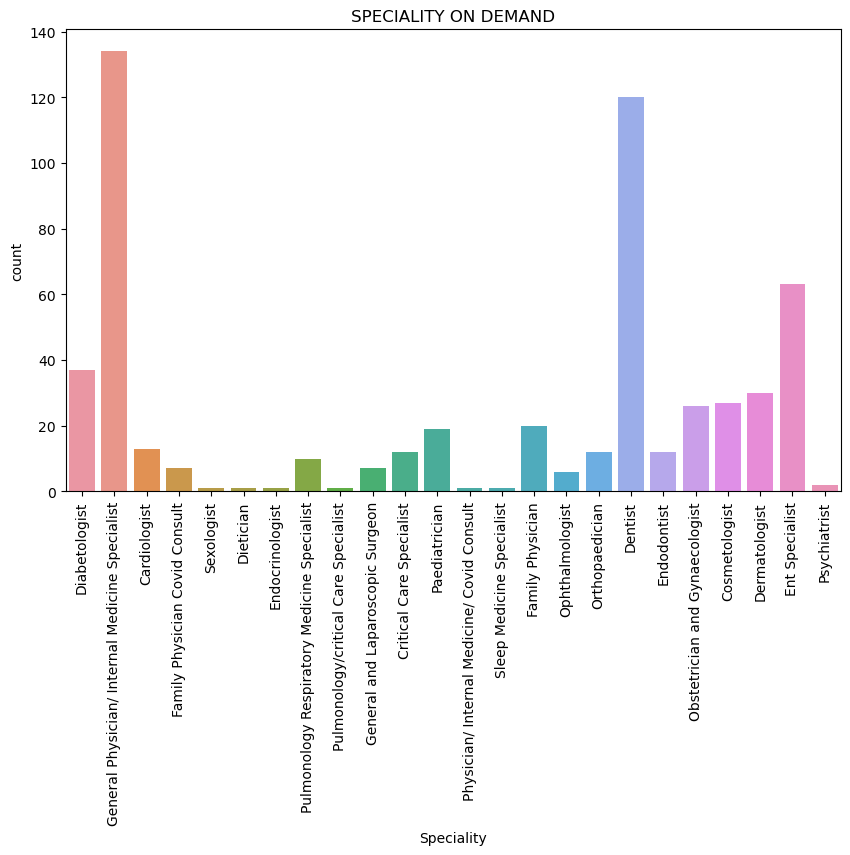

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Top_aplo_doc, x='Speciality')
plt.xticks(rotation=90)
plt.title('SPECIALITY ON DEMAND')
plt.show()

The above graph shows that these specialties are in high demand or are more commonly practiced by doctors.

In [19]:
# count of unique apollo branches

In [20]:
Top_aplo_doc['hospital_name'].value_counts()

Apollo Hospitals Jubilee Hills           26
Alo polyclinic                           19
Apollo Medical Center  Marathahalli      15
CG INCURE                                13
Medihealth point                         13
                                         ..
Narayanee Multispeciality Clinic          1
Apollo Speciality Hospitals Vanagaram     1
Apollo Hospitals Vijay Nagar              1
Apollo Clinic  A.S.Rao Nagar              1
Apollo Children Hospitals Greams Road     1
Name: hospital_name, Length: 112, dtype: int64

In [21]:
#total branches count
# As per our data set we can understand that there are 112 hospital in all the cities

In [22]:
Top_aplo_doc['hospital_name'].nunique()

112

In [24]:
# count of branches in each city

In [25]:
Top_aplo_doc['city'].value_counts()

 Kolkata              191
 Delhi                 77
 Hyderabad             48
 Gurugram              46
 Pune                  41
 Bangalore             28
 Bengaluru             25
 Chennai               16
 North 24 Parganas     11
 Bhubaneswar           10
 Ghaziabad              9
 South Delhi            9
 Dombivali East         6
 Mira Road              6
 Noida                  6
 Gurgaon                6
 Greater Noida          6
 Mumbai                 5
 East Delhi             3
 Tiruvallur             3
 Guwahati               2
 Nashik                 2
 Visakhapatnam          1
 Nalgonda               1
 Ahmedabad              1
 Warangal               1
 Chittoor               1
 Indore                 1
 Lucknow                1
Name: city, dtype: int64

Kolkatha is having more no of hospital compared to all other cities

In [26]:
#count of cities

In [27]:
Top_aplo_doc['city'].nunique()

29

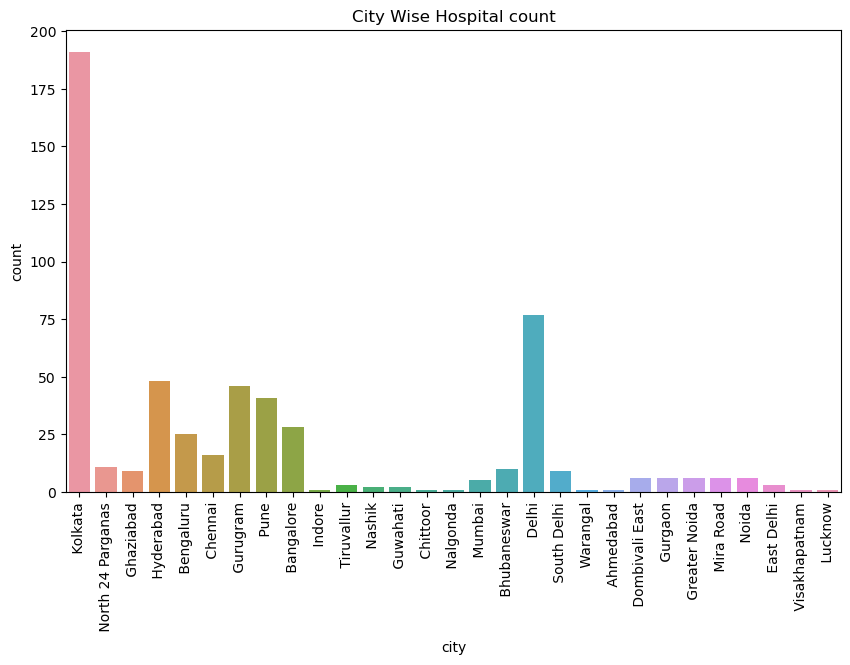

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Top_aplo_doc, x='city')
plt.xticks(rotation=90)
plt.title('City Wise Hospital count')
plt.show()

In [29]:
#the majority of doctors in the dataset primarily communicate in English

In [25]:
L_count = Top_aplo_doc['1st Language'].value_counts()

In [26]:
L_count

English    540
Hindi       10
Bengali      8
Telugu       2
Kannada      1
Tamil        1
Odia         1
Name: 1st Language, dtype: int64

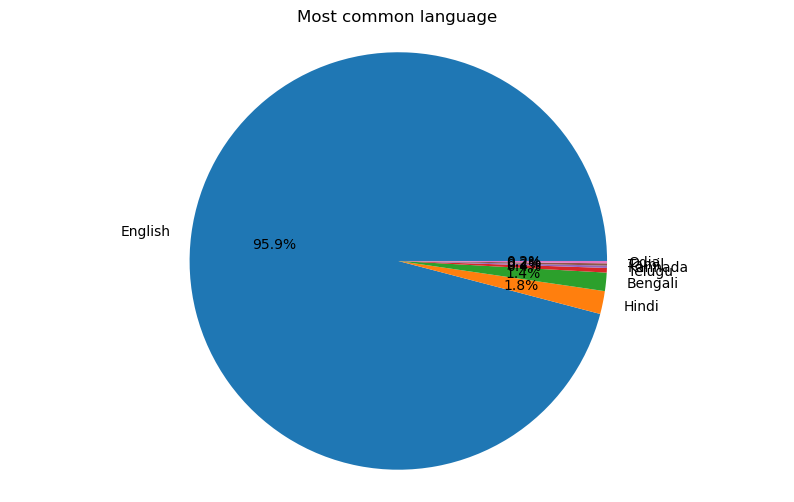

In [33]:
plt.figure(figsize=(10, 6))
plt.pie(L_count, labels=L_count.index, autopct='%1.1f%%')
plt.title('Most common language')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

English is the most commonly spoken language among doctors, followed by Hindi and Bengali.

In [33]:
# identifing the out layers

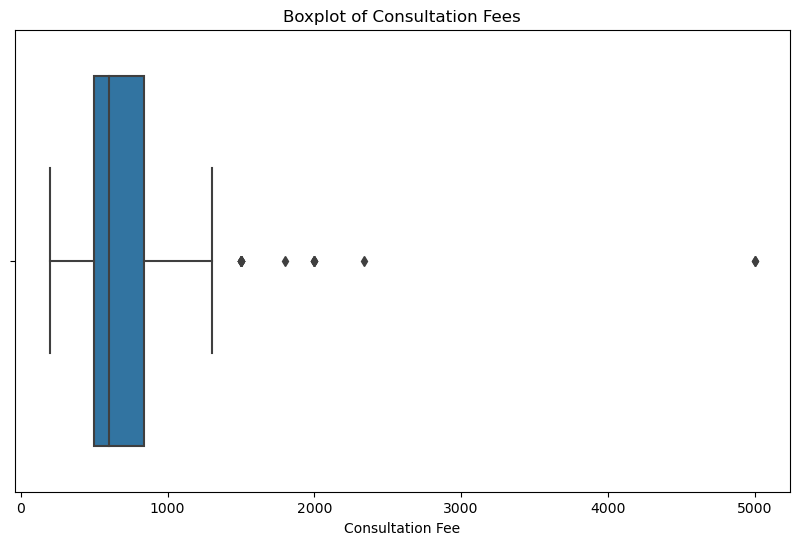

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Top_aplo_doc, x='ConsultationFee')
plt.xlabel('Consultation Fee')
plt.title('Boxplot of Consultation Fees')
plt.show()

The plot shows there are outlayers and this information can be useful for patients in understanding the expected cost of healthcare services, identifying outliers or unusual fees, and making informed decisions about healthcare providers based on their financial considerations.

# Bivariate Analysis

Bivariate analysis refers to the statistical analysis that examines the relationship or association between two variables, typically through the use of statistical measures and visual representations.

In [35]:
# numerical to numerical 
# Experience ,ConsultationFee

In [36]:
Avg_Experience = Top_aplo_doc.groupby(by = ['Experience'])['ConsultationFee'].mean()

In [37]:
Avg_exp_sort = Avg_Experience.sort_values(ascending = False)
Avg_exp_sort

Experience
22    2125.000000
53    2000.000000
30    1500.000000
52    1500.000000
24    1400.000000
17    1273.333333
27    1100.000000
33    1075.000000
26    1000.000000
36    1000.000000
23     975.000000
29     966.666667
25     921.428571
14     915.625000
18     875.000000
16     849.900000
20     846.153846
15     826.169811
9      805.555556
31     800.000000
8      795.833333
12     701.794872
5      674.000000
32     650.000000
40     642.857143
11     641.333333
10     613.507463
13     604.827586
1      590.000000
2      588.235294
19     585.714286
7      541.818182
6      504.736842
28     500.000000
51     500.000000
3      488.888889
4      479.166667
Name: ConsultationFee, dtype: float64

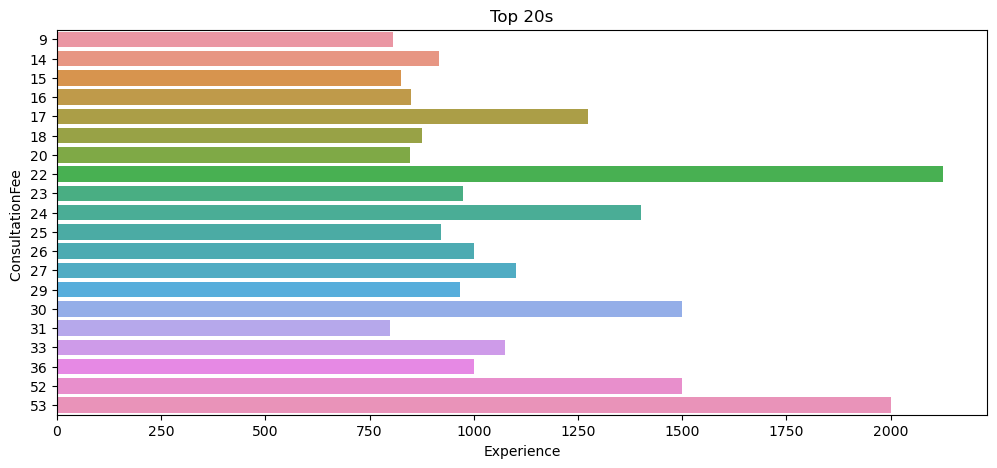

In [38]:
plt.figure(figsize=(12, 5))
Avg_Experience = Top_aplo_doc.groupby(by = ['Experience'])['ConsultationFee'].mean()
Avg_exp_sort = Avg_Experience.sort_values(ascending = False)
top_20  = Avg_exp_sort[:20]  # Display the top 20 hospital names
sns.barplot(x=top_20.values, y=top_20.index, orient='h')
plt.xlabel('Experience')
plt.ylabel('ConsultationFee ')
plt.title('Top 20s')
plt.show()

In [39]:
#1) correlation heatmap

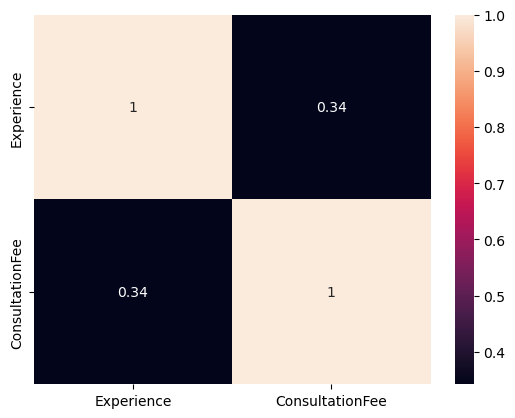

In [40]:
sns.heatmap(Numerical.corr(),annot = True)
plt.show()

In [41]:
# catogorical to numerical
# Qualification vs. ConsultationFee:

In [42]:
Avg_Qualification = Top_aplo_doc.groupby(by = ['Qualification'])['ConsultationFee'].mean()

In [43]:
sorted_qualification_avg_fee = Avg_Qualification.sort_values(ascending=False)

In [44]:
sorted_qualification_avg_fee[:20] 

Qualification
MD, DNB, EDIC, FICCM                                                                                                                                                                                                                               5000.0
MBBS, DNB, FCPS, FNB(CRITICAL CARE MEDICINE)                                                                                                                                                                                                       2342.0
MBBS, MD, FCCM, FCCP, EDIC                                                                                                                                                                                                                         2000.0
MBBS, DA, MD, MRCA, EDIC                                                                                                                                                                                                                    

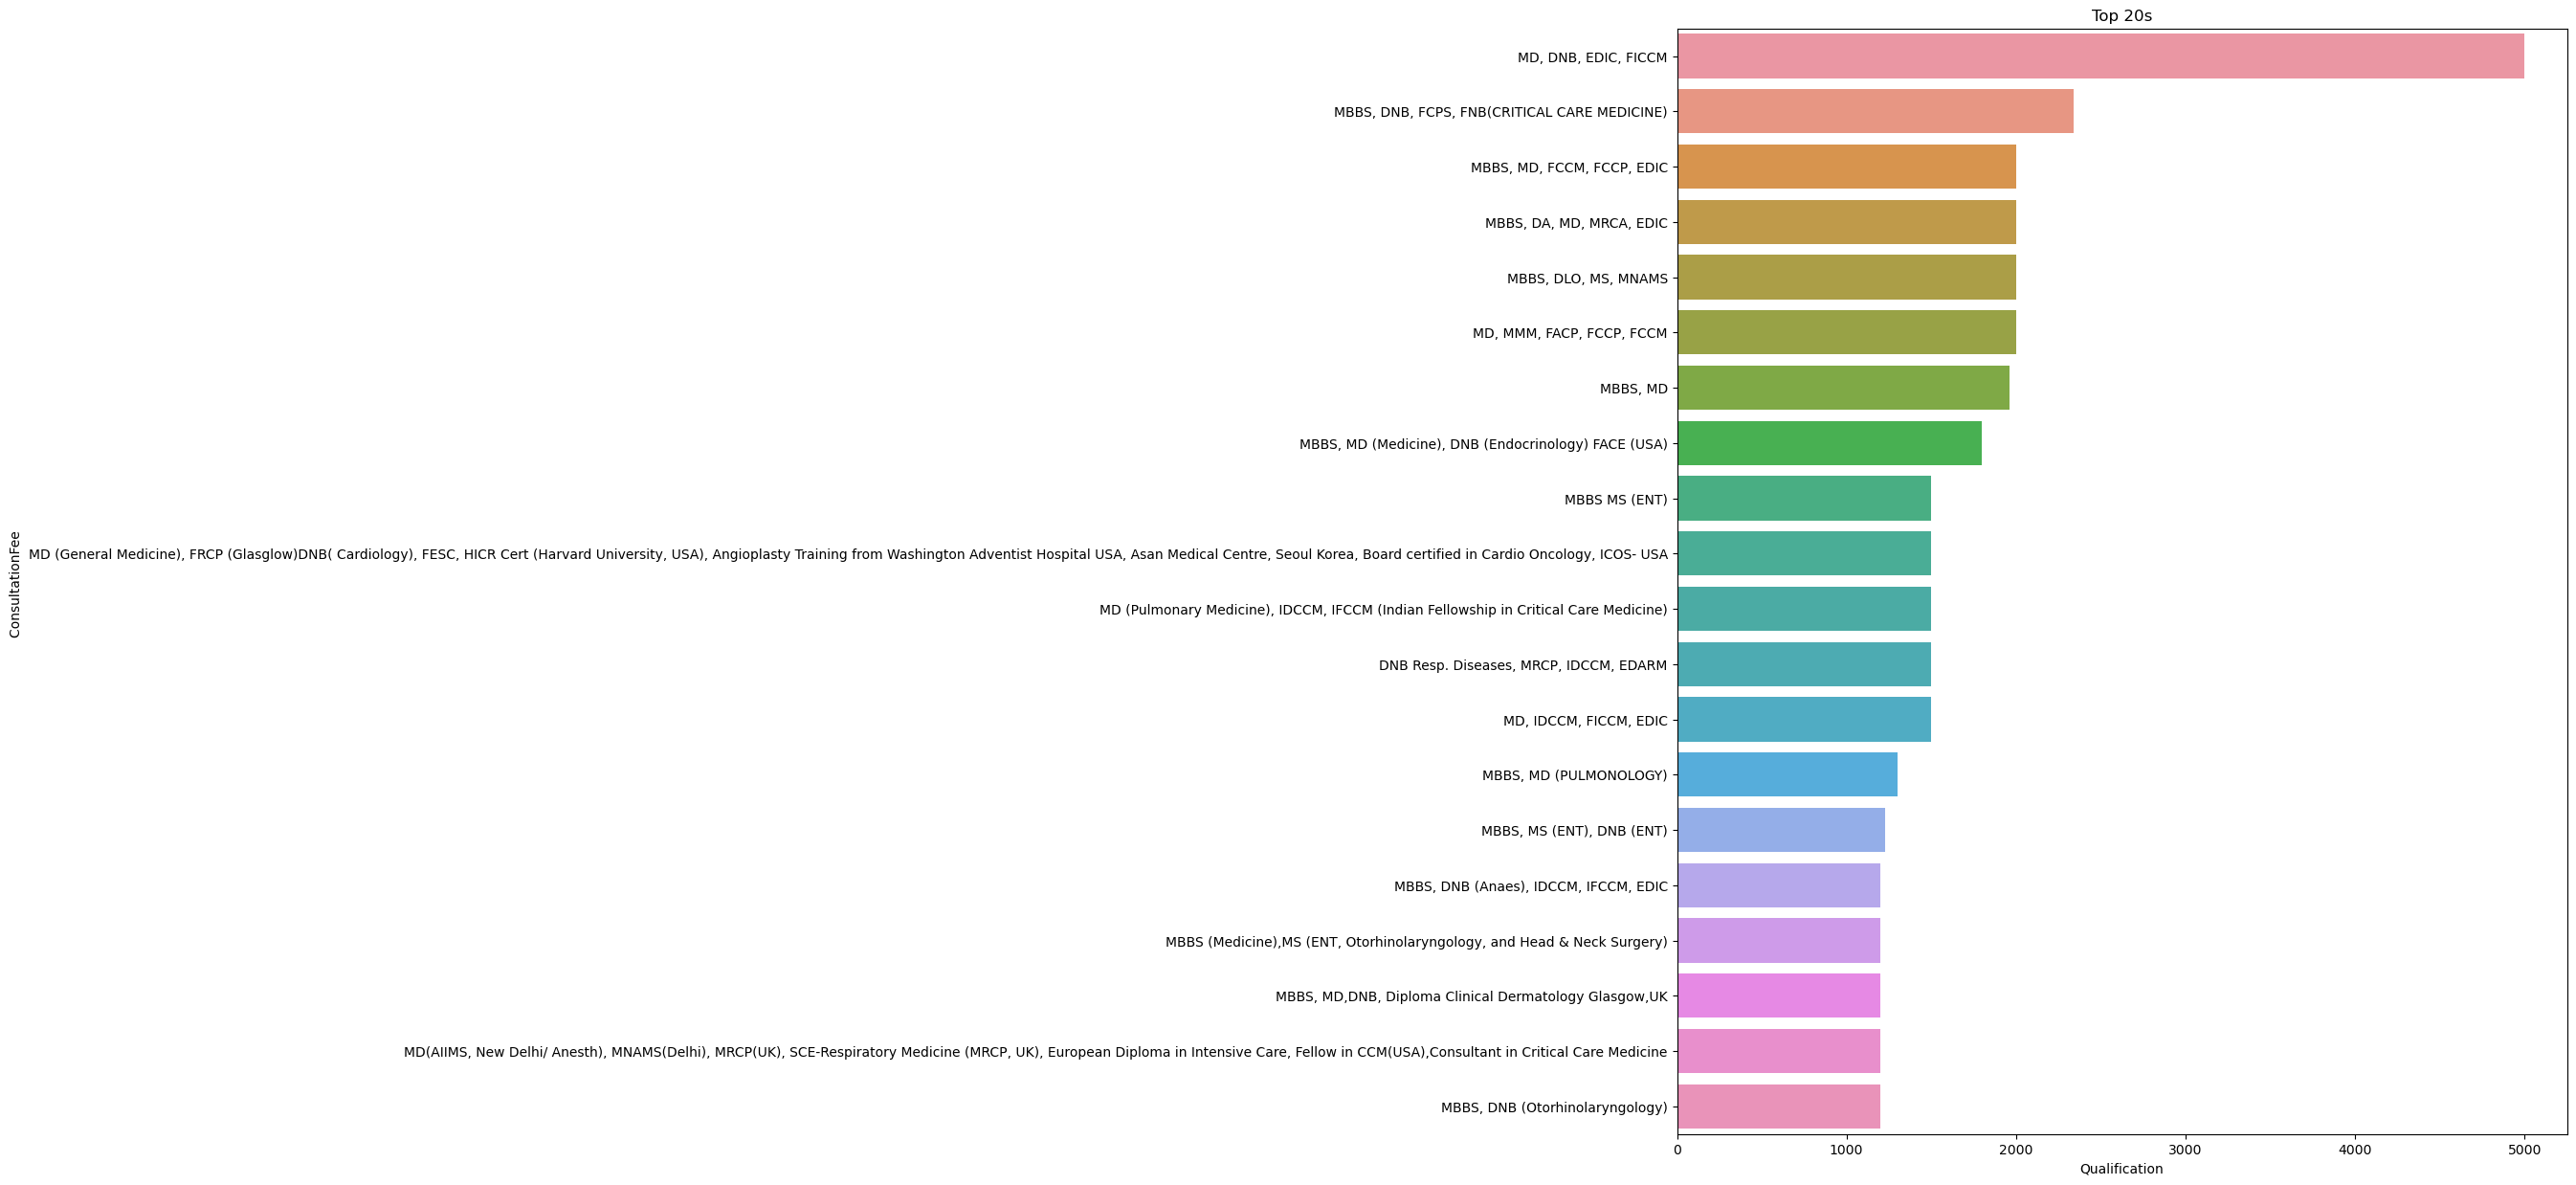

In [45]:
plt.figure(figsize=(12, 15))
Avg_Qualification = Top_aplo_doc.groupby(by = ['Qualification'])['ConsultationFee'].mean()
sorted_qualification_avg_fee = Avg_Qualification.sort_values(ascending=False)
top_20  = sorted_qualification_avg_fee[:20]  # Display the top 20 hospital names
sns.barplot(x=top_20.values, y=top_20.index, orient='h')
plt.xlabel('Qualification')
plt.ylabel('ConsultationFee ')
plt.title('Top 20s')
plt.show()

In [46]:
#Speciality,ConsultationFee
# pivot table

In [47]:
pivot_table = pd.pivot_table(Top_aplo_doc, values='ConsultationFee', index='Speciality', aggfunc='mean')

In [48]:
sorted_Speciality_avg_fee = pivot_table.sort_values(by ='ConsultationFee', ascending=False)

In [49]:
sorted_Speciality_avg_fee[:20] 

,ConsultationFee
Speciality,
Sleep Medicine Specialist,2000.000000
Pulmonology/critical Care Specialist,2000.000000
Critical Care Specialist,1770.166667
Pulmonology Respiratory Medicine Specialist,1300.000000
Sexologist,1000.000000
Endocrinologist,1000.000000
Dermatologist,928.000000
Ophthalmologist,900.000000
Orthopaedician,875.000000


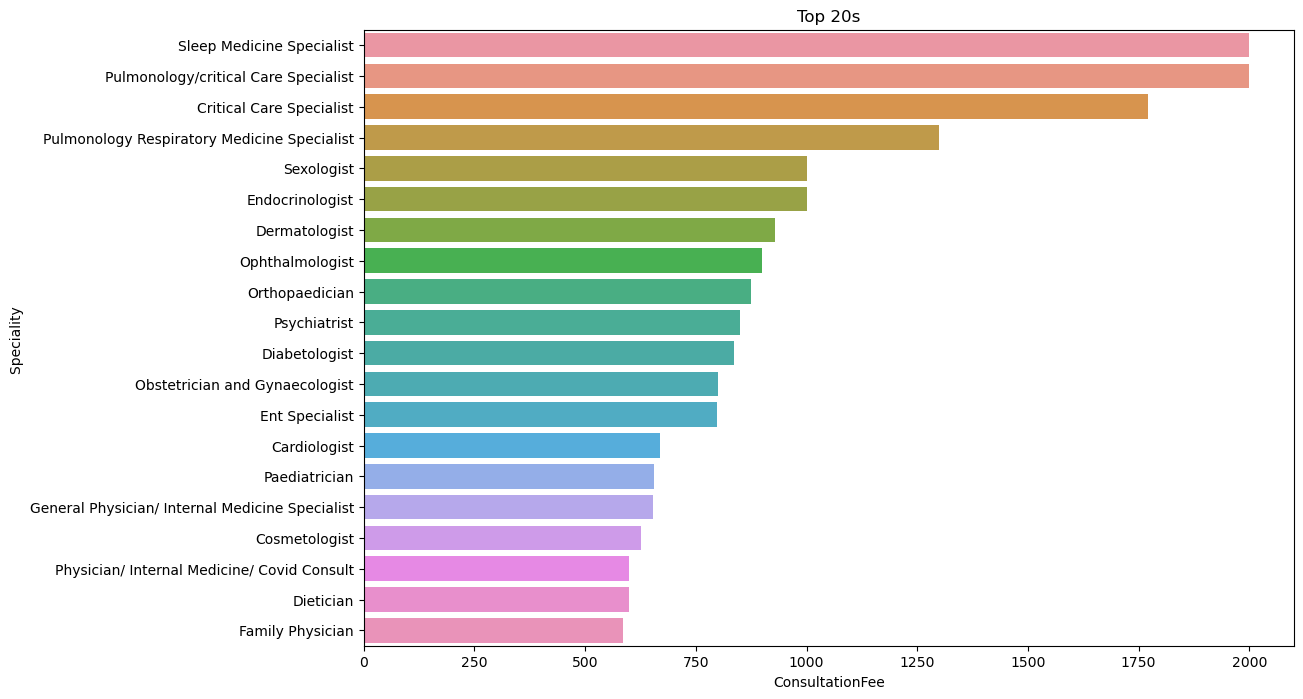

In [9]:
plt.figure(figsize=(12, 8))
Avg_Speciality = Top_aplo_doc.groupby(by = ['Speciality'])['ConsultationFee'].mean()
sorted_Speciality_avg_fee= Avg_Speciality.sort_values(ascending=False)
top_20  = sorted_Speciality_avg_fee[:20]  # Display the top 20 hospital names
sns.barplot(x=top_20.values, y=top_20.index, orient='h')
plt.xlabel('ConsultationFee')
plt.ylabel('Speciality ')
plt.title('Top 20s')
plt.show()

From the above graphs we can understand that these are the top 20 doctors based their specilization are taking high consultaion fee

In [51]:
## catogorical to catogorical

In [52]:
Top_aplo_doc.groupby(by='city')['hospital_name'].size()

city
 Ahmedabad              1
 Bangalore             28
 Bengaluru             25
 Bhubaneswar           10
 Chennai               16
 Chittoor               1
 Delhi                 77
 Dombivali East         6
 East Delhi             3
 Ghaziabad              9
 Greater Noida          6
 Gurgaon                6
 Gurugram              46
 Guwahati               2
 Hyderabad             48
 Indore                 1
 Kolkata              191
 Lucknow                1
 Mira Road              6
 Mumbai                 5
 Nalgonda               1
 Nashik                 2
 Noida                  6
 North 24 Parganas     11
 Pune                  41
 South Delhi            9
 Tiruvallur             3
 Visakhapatnam          1
 Warangal               1
Name: hospital_name, dtype: int64

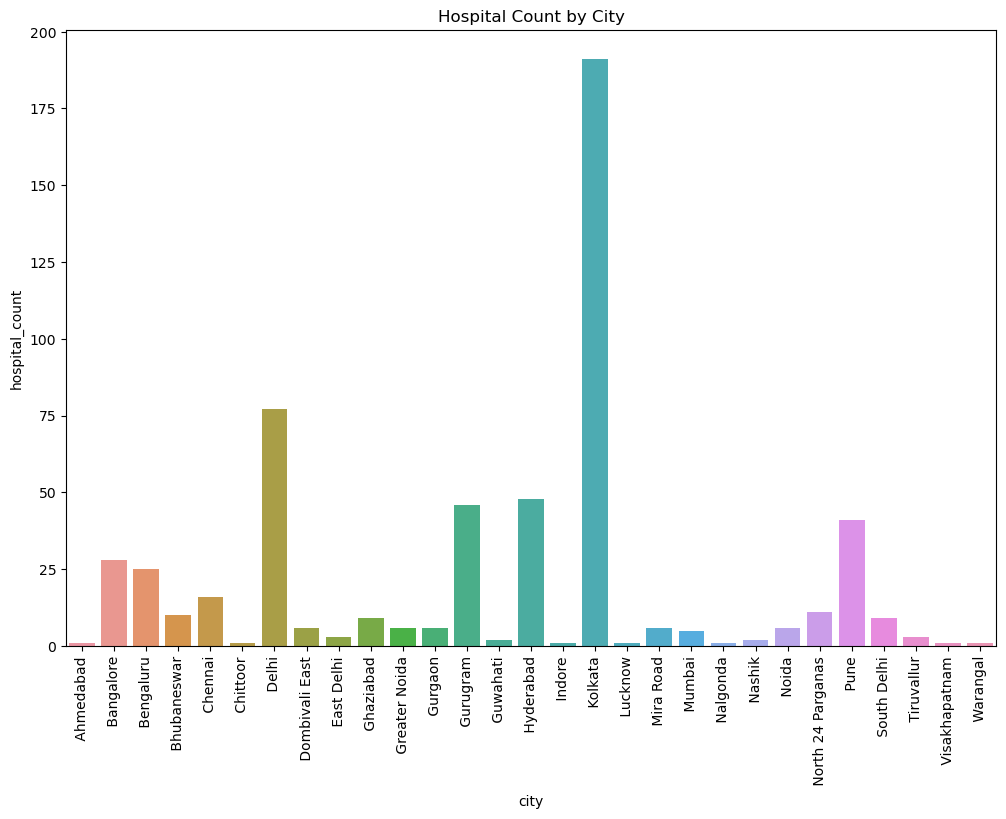

In [53]:
plt.figure(figsize=(12, 8))
# Counting hospitals by city
CAHBC = Top_aplo_doc.groupby(by='city')['hospital_name'].size().reset_index(name='hospital_count')
# Plotting the count using seaborn
sns.barplot(data=CAHBC, x='city', y='hospital_count')
plt.xticks(rotation=90)
plt.title('Hospital Count by City')
plt.show()

The no of hospitals on each city .Kolkata has a well-developed healthcare infrastructure with a higher concentration of hospitals. A high number of hospitals can be an indicator of a robust healthcare system, other factors such as the quality of healthcare services, infrastructure, and patient outcomes also need to be considered to have a comprehensive understanding of the healthcare landscape in Kolkata

In [12]:
#Top_aplo_doc.groupby(by='hospital_name')['Speciality'].size()
pd.crosstab(Top_aplo_doc['Speciality'], Top_aplo_doc['hospital_name']).sum()
# COUNT OF SPECIALISTS IN EACH HOSPITAL

hospital_name
828 Healthcare                      1
ACCURA EYE CARE                     6
AESTHETICAROOTS                    12
APOLLO CLINIC INDIRAPURAM           1
APOLLO REACH NSR HOSPITALS          1
                                   ..
Swash Chest and Diabetes Clinic     6
THE DOCTORS NESST                  13
VIP MEDICAL SERVICE                 6
WELL CURE                          12
WELLNESS CLINIC                     6
Length: 112, dtype: int64

In [55]:
# count of specialists in each city using cross tab 
# catogorical to catogorical

In [14]:
cross_tab = pd.crosstab(Top_aplo_doc['Speciality'], Top_aplo_doc['city']).sum()
cross_tab

city
 Ahmedabad              1
 Bangalore             28
 Bengaluru             25
 Bhubaneswar           10
 Chennai               16
 Chittoor               1
 Delhi                 77
 Dombivali East         6
 East Delhi             3
 Ghaziabad              9
 Greater Noida          6
 Gurgaon                6
 Gurugram              46
 Guwahati               2
 Hyderabad             48
 Indore                 1
 Kolkata              191
 Lucknow                1
 Mira Road              6
 Mumbai                 5
 Nalgonda               1
 Nashik                 2
 Noida                  6
 North 24 Parganas     11
 Pune                  41
 South Delhi            9
 Tiruvallur             3
 Visakhapatnam          1
 Warangal               1
dtype: int64

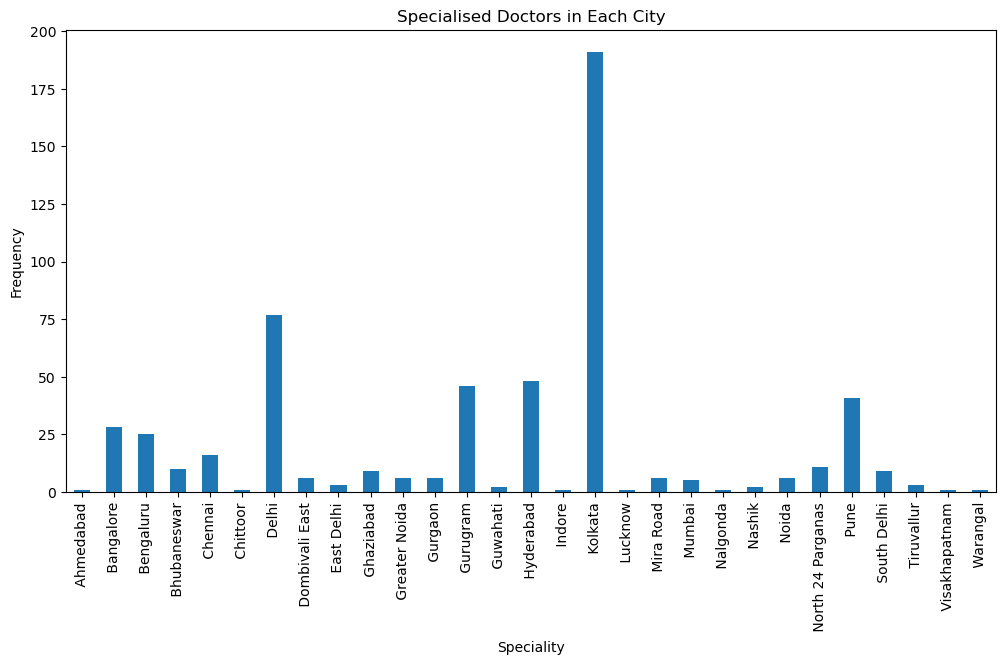

In [15]:
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar')
plt.xlabel('Speciality')
plt.ylabel('Frequency')
plt.title('Specialised Doctors in Each City')
plt.xticks(rotation=90)
plt.show()

The graph provides a visual representation of the distribution of specialists across different cities.Among all the cities kolkota is having Higher frequencies of certain specialties may indicate a greater availability of specialized medical services 

# Multivariate Analysis 

In [58]:
specialty_stats = Top_aplo_doc.groupby('Speciality').agg({'ConsultationFee': 'mean', 'Experience': 'mean'})

In [59]:
sorted_specialties = specialty_stats.sort_values(by=['ConsultationFee', 'Experience'], ascending=False)

In [60]:
sorted_specialties

,ConsultationFee,Experience
Speciality,,
Pulmonology/critical Care Specialist,2000.000000,30.000000
Sleep Medicine Specialist,2000.000000,25.000000
Critical Care Specialist,1770.166667,19.000000
Pulmonology Respiratory Medicine Specialist,1300.000000,13.500000
Sexologist,1000.000000,22.000000
Endocrinologist,1000.000000,13.000000
Dermatologist,928.000000,11.400000
Ophthalmologist,900.000000,20.000000
Orthopaedician,875.000000,12.500000


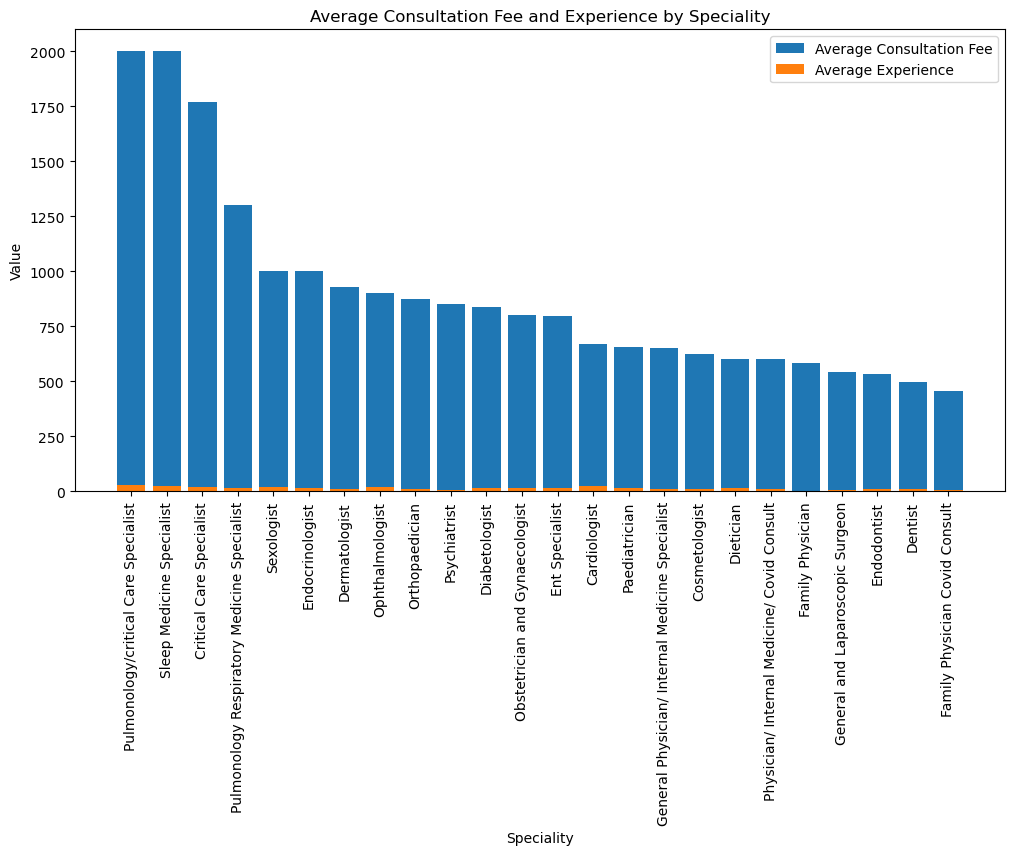

In [61]:
plt.figure(figsize=(12, 6))
plt.bar(sorted_specialties.index, sorted_specialties['ConsultationFee'], label='Average Consultation Fee')
plt.bar(sorted_specialties.index, sorted_specialties['Experience'], label='Average Experience')
plt.xlabel('Speciality')
plt.ylabel('Value')
plt.title('Average Consultation Fee and Experience by Speciality')
plt.xticks(rotation=90)
plt.legend()
plt.show()

The graph represents the average consultation fee charged by doctors in different specializations based on their experience.

In [62]:
top_specialty = sorted_specialties.head(10)

In [68]:
top_specialty # top 10 specializations on demand

,ConsultationFee,Experience
Speciality,,
Pulmonology/critical Care Specialist,2000.000000,30.0
Sleep Medicine Specialist,2000.000000,25.0
Critical Care Specialist,1770.166667,19.0
Pulmonology Respiratory Medicine Specialist,1300.000000,13.5
Sexologist,1000.000000,22.0
Endocrinologist,1000.000000,13.0
Dermatologist,928.000000,11.4
Ophthalmologist,900.000000,20.0
Orthopaedician,875.000000,12.5


In [69]:
print(top_specialty.index[0])

Pulmonology/critical Care Specialist


In [119]:
sorted_doctors = Top_aplo_doc.sort_values(by=['Experience', 'ConsultationFee'], ascending=False)

In [120]:
sorted_doctors[:10]

,DoctorName,Qualification,Speciality,Experience,ConsultationFee,Language,hospital_name,city,1st Language
415,Dr. Shivani Mishra,"MBBS, DLO, MS, MNAMS",Ent Specialist,53,2000,English,Apollo Hospitals Indraprastha,South Delhi,English
79,Dr Arpan Chakraborty,"MD, IDCCM, FICCM, EDIC",Critical Care Specialist,52,1500,"English, Tamil",Apollo Hospitals Greams Road,Chennai,English
18,Dr. Shrikant Govind Kulkarni,"MBBS, MD (Gen. Med.), DPH",General Physician/ Internal Medicine Specialist,51,500,"English, Hindi, Marathi, Kannada",Apollo Clinic Wanowrie,Pune,English
34,Dr. Subramaniam J R,MD,Diabetologist,40,1500,"English, English, Hindi, Tamil",Apollo Hospitals Greams Road,Chennai,English
125,Dr. Manoj Dinkar,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
196,+Services,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
267,Dr. Sabika Ahmed,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
344,Dr. Dixant Chhikara,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
464,Dr. Ritika Bhatt,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
535,Dr. Saurabh Singh,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English


The above data shows the top doctors in Apollo based on their experience and specialization.

In [133]:
Doctors_in_hyd = sorted_doctors[sorted_doctors['city']== ' Hyderabad']

In [134]:
Doctors_in_hyd[0:10]

,DoctorName,Qualification,Speciality,Experience,ConsultationFee,Language,hospital_name,city,1st Language
125,Dr. Manoj Dinkar,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
196,+Services,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
267,Dr. Sabika Ahmed,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
344,Dr. Dixant Chhikara,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
464,Dr. Ritika Bhatt,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
535,Dr. Saurabh Singh,"MBBS, MD, DM, FACC, FESC",Cardiologist,40,500,"English, Hindi, Telugu, Bengali",Apollo Hospitals Jubilee Hills,Hyderabad,English
386,Dr. Aswini Rana,MBBS; MS (ENT),Ent Specialist,36,1000,"English, Hindi, Telugu",Apollo Hospitals Jubilee Hills,Hyderabad,English
407,Dr. Parwez,"MBBS, MS",Ent Specialist,30,1000,"English, Hindi, Telugu",Apollo Hospitals Hyderguda,Hyderabad,English
405,Dr. Mohd Seraj Ahmed,"MBBS, MS (ENT), Fellow UICC (USA). Associate p...",Ent Specialist,29,1000,"English, Hindi, Telugu",Apollo Hospitals Jubilee Hills,Hyderabad,English
380,Dr. Seema Pavan Patil,"MS,ENT, (AIIMS, New Delhi), consultant ENT sur...",Ent Specialist,24,1000,"Telugu, English, Hindi",Apollo Hospitals Jubilee Hills,Hyderabad,Telugu


The above list shows the top ten doctors in Hyderabad city based on their experience and specialization.